In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [119]:
path_gas_test = 'Geochemistry Data/CNS_gas_test.csv'
path_gas_train = 'Geochemistry Data/CNS_gas_train.csv'
path_rock_samples = 'Geochemistry Data/CNS_rock_samples.csv'
path_prod = 'Production Data/CNS_Field_Production.csv'
df_test = pd.read_csv(path_gas_test, skiprows = [1], header = 0)
df_train = pd.read_csv(path_gas_train, skiprows = [1], header = 0)
df_rock = pd.read_csv(path_rock_samples, skiprows = [1], header = 0)
df_prod = pd.read_csv(path_prod, skiprows = [1], header = 0)

df_train['WH_LONG'].values[-5] = df_train['WH_LONG'].values[-4]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,8,9,15,17,20,21,22,23,24,25,27,28,29,30,31,32,33,34,36,42,43,44,46,47,48,56,57,58,92,93,99,100,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


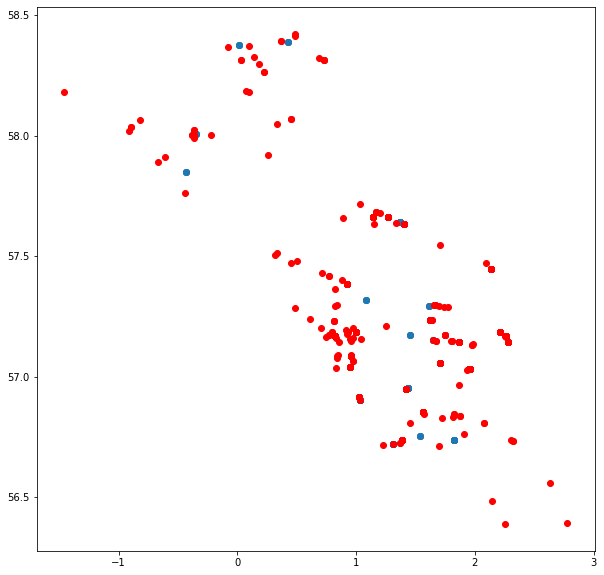

In [120]:
plt.figure(figsize = (10, 10))
df_train['WH_LONG'].iloc[-5] = df_train['WH_LONG'].iloc[-4]
df_train['WH_LONG'] = df_train['WH_LONG'].astype(float)
plt.scatter(df_test['WH_LONG'], df_test['WH_LAT'])
plt.scatter(df_train['WH_LONG'], df_train['WH_LAT'], color = 'red')

In [68]:
df_train.dropna(subset=['WH_LAT'], inplace = True)
df_test.dropna(subset=['WH_LAT'], inplace = True)

cols = [
    'WH_LAT', 'WH_LONG', 'WH_TD_M', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'CSIA_CONC_C1', 'CSIA_NC1', 'CSIA_NC2',
       'CSIA_NC3', 'CSIA_IC4', 'CSIA_NC4', 'CSIA_IC5', 'CSIA_NC5'
]
X_test = df_test[cols]
X_train = df_train[cols]

y_train = df_train[['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']]

In [69]:
X_train.isna().sum()

WH_LAT               0
WH_LONG              0
WH_TD_M            355
SH_DEPTH_TOP_FT      0
SH_DEPTH_BOT_FT      0
CSIA_CONC_C1       386
CSIA_NC1            99
CSIA_NC2           156
CSIA_NC3           208
CSIA_IC4           248
CSIA_NC4           230
CSIA_IC5           283
CSIA_NC5           281
dtype: int64

In [15]:
X_train_init = X_train.copy()

In [48]:
X_train.dropna(subset=['WH_LAT'], inplace = True)
X_test.dropna(subset=['WH_LAT'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
from scipy.spatial import cKDTree
from sklearn.neighbors import KDTree

In [70]:
coords = X_train[['WH_LONG', 'WH_LAT']].values
tree = KDTree(coords, leaf_size=2) 
for col in X_train.isna().sum().index:
    print(col)
    idxs_to_fill = X_train.index[X_train[col].isnull()]
    for idx in idxs_to_fill:
        coord = [X_train[['WH_LONG', 'WH_LAT']].loc[idx].values]
        #print(coord)
        dist, ind = tree.query(coord, k=300)  
        df_neib_vals = pd.DataFrame({'param': X_train.iloc[ind[0]][col].to_list(), 'weights': dist[0]})
        df_neib_vals.dropna(inplace=True)
        df_neib_vals = df_neib_vals[df_neib_vals['weights'] != 0]
        df_neib_vals['weights'] = 1/df_neib_vals['weights'].values
        X_train[col].loc[idx] = np.average(np.array(df_neib_vals['param'], dtype=float),
                                     weights=np.array(df_neib_vals['weights'], dtype=float))
        print(X_train[col].loc[idx], X_train[col].mean())

WH_LAT
WH_LONG
WH_TD_M
3200.068440650742 4561.231520618892
3200.068440650742 4560.205776022081
3200.068440650742 4559.181576221349
4718.019606666668 4559.30109317428
4718.019606666668 4559.420430402471
4718.019606666668 4559.539588311009
4718.019606666668 4559.658567303768
4718.019606666668 4559.77736778341
4718.019606666668 4559.895990151388
4718.019606666668 4560.014434807954
4718.019606666668 4560.132702152159
4718.019606666668 4560.250792581864
4718.019606666668 4560.368706493736
4718.019606666668 4560.48644428326
4718.019606666668 4560.60400634474
4718.019606666668 4560.721393071304
4718.019606666668 4560.838604854907
4718.019606666668 4560.955642086338
4718.019606666668 4561.072505155222
4718.019606666668 4561.189194450026
4718.019606666668 4561.305710358062
4718.019606666668 4561.422053265493
4718.019606666668 4561.538223557333
4718.019606666668 4561.6542216174585
4718.019606666668 4561.770047828606
4718.019606666668 4561.88570257238
4718.019606666668 4562.001186229254
4718.0196

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

4718.019606666668 4563.600203715436
4718.019606666668 4563.713165970704
4718.019606666668 4563.825963076476
4718.019606666668 4563.938595394657
4718.019606666668 4564.051063286096
4718.019606666668 4564.16336711059
4718.019606666668 4564.275507226885
4718.019606666668 4564.387483992682
4718.019606666668 4564.499297764643
4718.019606666668 4564.61094889839
4718.019606666668 4564.722437748512
4718.019606666668 4564.833764668569
4718.019606666668 4564.944930011093
4718.019606666668 4565.055934127595
4718.019606666668 4565.166777368565
4718.019606666668 4565.27746008348
4718.019606666668 4565.387982620805
4718.019606666668 4565.4983453279965
4718.019606666668 4565.608548551507
4718.019606666668 4565.718592636789
4718.019606666668 4565.828477928297
4718.019606666668 4565.938204769493
4718.019606666668 4566.047773502848
4718.019606666668 4566.157184469848
4718.019606666668 4566.266438010997
4718.019606666668 4566.3755344658175
4718.019606666668 4566.484474172858
4718.019606666668 4566.593257

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

4718.019606666668 4568.41896522597
4718.019606666668 4568.524989776956
4718.019606666668 4568.630864151524
4718.019606666668 4568.73658866852
4718.019606666668 4568.842163645888
4718.019606666668 4568.947589400673
4718.019606666668 4569.052866249024
4718.019606666668 4569.157994506199
4718.019606666668 4569.262974486567
4718.019606666668 4569.367806503607
4718.019606666668 4569.47249086992
4718.019606666668 4569.577027897222
4718.019606666668 4569.681417896357
4718.019606666668 4569.785661177291
4718.019606666668 4569.889758049124
4718.019606666668 4569.993708820083
4718.019606666668 4570.097513797536
4718.019606666668 4570.201173287984
4718.019606666668 4570.304687597072
4718.019606666668 4570.408057029591
4718.019606666668 4570.511281889477
4718.019606666668 4570.614362479818
4718.019606666668 4570.717299102853
4718.019606666668 4570.82009205998
4718.019606666668 4570.922741651757
4718.019606666668 4571.025248177899


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

4718.019606666668 4571.127611937292
4718.019606666668 4571.229833227988
4718.019606666668 4571.331912347208
4718.019606666668 4571.43384959135
4718.019606666668 4571.535645255985
4718.019606666668 4571.637299635869
4718.019606666668 4571.738813024933
4718.019606666668 4571.840185716299
4718.019606666668 4571.941418002276
4718.019606666668 4572.042510174362
4718.019606666668 4572.14346252325
4718.019606666668 4572.2442753388295
4718.019606666668 4572.344948910189
4718.019606666668 4572.445483525617
4718.019606666668 4572.545879472611
4718.019606666668 4572.646137037872
4718.019606666668 4572.746256507314
4718.019606666668 4572.84623816606
4718.019606666668 4572.946082298455
4718.019606666668 4573.045789188054
4718.019606666668 4573.145359117641
4718.019606666668 4573.244792369219
4718.019606666668 4573.344089224019
4718.019606666668 4573.443249962499
4718.019606666668 4573.542274864351
4718.019606666668 4573.6411642085
4718.019606666668 4573.73991827311


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

4718.019606666668 4573.8385373355795
4718.019606666668 4573.937021672554
4718.019606666668 4574.035371559922
4718.019606666668 4574.133587272819
4718.019606666668 4574.23166908563
4718.019606666668 4574.329617271993
4718.019606666668 4574.427432104801
4718.019606666668 4574.5251138562035
4718.019606666668 4574.622662797611
4718.019606666668 4574.720079199696
4718.019606666668 4574.817363332396
4718.019606666668 4574.914515464915
4718.019606666668 4575.01153586573
4718.019606666668 4575.108424802587
4718.019606666668 4575.205182542509
4718.019606666668 4575.301809351794
4718.019606666668 4575.398305496024
4718.019606666668 4575.494671240058
4718.019606666668 4575.590906848044
4718.019606666668 4575.687012583414


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

4718.019606666668 4575.782988708891
4718.019606666668 4575.878835486491
4718.019606666668 4575.974553177522
4718.019606666668 4576.0701420425885
4718.019606666668 4576.165602341595
4718.019606666668 4576.26093433375
4718.019606666668 4576.35613827756
4718.019606666668 4576.451214430841
4718.019606666668 4576.546163050717
4718.019606666668 4576.6409843936235
4718.019606666668 4576.735678715307
4718.019606666668 4576.83024627083
4718.019606666668 4576.924687314572
4718.019606666668 4577.019002100235
4718.019606666668 4577.113190880841
4718.019606666668 4577.207253908736
4718.019606666668 4577.301191435592
4718.019606666668 4577.395003712412
4718.019606666668 4577.48869098953
4718.019606666668 4577.582253516613
4718.019606666668 4577.675691542661
4718.019606666668 4577.769005316015
4718.019606666668 4577.862195084354
4718.019606666668 4577.955261094701
4718.019606666668 4578.048203593422
4718.019606666668 4578.141022826228
4718.019606666668 4578.233719038184
4718.019606666668 4578.3262924

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

4718.019606666668 4578.5110719898275
4718.019606666668 4578.603278556038
4718.019606666668 4578.69536331701
4718.019606666668 4578.787326513941
4718.019606666668 4578.8791683873915
4718.019606666668 4578.9708891772925
4718.019606666668 4579.062489122937
4718.019606666668 4579.153968462992
4718.019606666668 4579.245327435495
4718.019606666668 4579.336566277856
4718.019606666668 4579.427685226863
4718.019606666668 4579.518684518682
4718.019606666668 4579.6095643888575
4718.019606666668 4579.700325072318
4718.019606666668 4579.790966803376
4718.019606666668 4579.88148981573
4718.019606666668 4579.971894342464
4718.019606666668 4580.062180616058
4718.019606666668 4580.152348868379
4718.019606666668 4580.242399330689
4718.019606666668 4580.33233223365
4718.019606666668 4580.422147807319
4718.019606666668 4580.511846281151
4718.019606666668 4580.6014278840075
4718.019606666668 4580.690892844153
4718.019606666668 4580.780241389255
4718.019606666668 4580.869473746393
4718.019606666668 4580.958

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

4718.019606666668 4581.3139006191095
4718.019606666668 4581.402440584166
4718.019606666668 4581.490865934381
4718.019606666668 4581.579176892164
4718.019606666668 4581.667373679349
4718.019606666668 4581.755456517196
4718.019606666668 4581.843425626395
4718.019606666668 4581.931281227066
4718.019606666668 4582.019023538762
4718.019606666668 4582.106652780468
4718.019606666668 4582.194169170607
4718.019606666668 4582.28157292704
4718.019606666668 4582.368864267065
4718.019606666668 4582.456043407425
4718.019606666668 4582.543110564303
4718.019606666668 4582.630065953328
4718.019606666668 4582.7169097895785
4718.019606666668 4582.803642287577
4718.019606666668 4582.8902636612975
4718.019606666668 4582.976774124169
4718.019606666668 4583.063173889072
4718.019606666668 4583.149463168341
4718.019606666668 4583.235642173771
4718.019606666668 4583.321711116615
4718.019606666668 4583.4076702075845
4718.019606666668 4583.493519656858
4718.019606666668 4583.579259674072
4718.019606666668 4583.66

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

4718.019606666668 4584.43068682412
4718.019606666668 4584.515236773388
4718.019606666668 4584.599679765098
4718.019606666668 4584.684016002077
4718.019606666668 4584.768245686641
4718.019606666668 4584.852369020593
4718.019606666668 4584.936386205228
4718.019606666668 4585.020297441332
4718.019606666668 4585.104102929186
4718.019606666668 4585.187802868568
4718.019606666668 4585.27139745875
4718.019606666668 4585.354886898503
4718.019606666668 4585.4382713861005
4718.019606666668 4585.521551119317
4718.019606666668 4585.60472629543
4718.019606666668 4585.687797111221
4718.019606666668 4585.770763762979
4718.019606666668 4585.853626446503
4718.019606666668 4585.9363853570985
4718.019606666668 4586.019040689582
4718.019606666668 4586.101592638286
4718.019606666668 4586.184041397053
4718.019606666668 4586.266387159246
4718.019606666668 4586.34863011774
4718.019606666668 4586.430770464932
4718.019606666668 4586.512808392738
4718.019606666668 4586.5947440925975
4718.019606666668 4586.676577

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

4801.549997012509 4587.776698274584
4801.549997012509 4587.908820214472
4801.549997012509 4588.040778940103
4801.549997012509 4588.172574753728
4801.549997012509 4588.3042079568495
4801.549997012509 4588.435678850225
4801.549997012509 4588.566987733873
4801.549997012509 4588.698134907075
4801.549997012509 4588.829120668371
4801.549997012509 4588.959945315569
4801.549997012509 4589.0906091457455
4801.549997012509 4589.221112455246
4801.549997012509 4589.351455539689
4801.549997012509 4589.4816386939665
4801.549997012509 4589.611662212249
4801.549997012509 4589.741526387985
4801.549997012509 4589.871231513902
4801.549997012509 4590.000777882016
4801.549997012509 4590.130165783626
4801.549997012509 4590.259395509315
4801.549997012509 4590.388467348963
4801.549997012509 4590.517381591737
4801.549997012509 4590.6461385261
4801.549997012509 4590.774738439811
4801.549997012509 4590.903181619929
4801.549997012509 4591.031468352811
4801.549997012509 4591.159598924119
4801.549997012509 4591.2875

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

2856.4249333078683 4582.095802631054
2856.4249333078683 4581.056241866402
2856.4249333078683 4580.017932830545
2856.4249333078683 4578.980873264045
2856.4249333078683 4577.945060912899
2856.4249333078683 4576.91049352852
2856.4249333078683 4575.877168867728
2856.4249333078683 4574.845084692722
2856.4249333078683 4573.814238771076
2856.4249333078683 4572.784628875714
2856.4249333078683 4571.7562527849
2856.4249333078683 4570.7291082822185
2856.4249333078683 4569.703193156562
2856.4249333078683 4568.678505202106
2856.4249333078683 4567.655042218308
2856.4249333078683 4566.632802009878
2856.4249333078683 4565.6117823867735
2856.4249333078683 4564.5919811641725
2856.4249333078683 4563.573396162469
2856.4249333078683 4562.556025207253
2856.4249333078683 4561.539866129289
2856.4249333078683 4560.524916764515
SH_DEPTH_TOP_FT
SH_DEPTH_BOT_FT
CSIA_CONC_C1
3.016376963297241 2.5953612629060214
3.013527028176554 2.5956839216755196
3.013527028176554 2.5960060828987284
3.724368686821569 2.5968753915

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

2.4257669601624774 2.599191979673189
2.5652957159472773 2.5991661441063245
2.5652957159472773 2.5991403478929516
2.3687382407035855 2.5989650038235528
2.3687382407035855 2.5987899264371497
1.756860539340732 2.598150162465192
1.6791169180021428 2.597452339196807
1.6791169180021428 2.5967555748408175
1.1336321047995082 2.5956463076156155
1.4029058171431985 2.5947427163349546
1.4029058171431985 2.5938404930955965
1.4029058171431985 2.5929396347930607
1.4478555539987517 2.592074113945899
2.366893047803933 2.5919040376119553
2.925553383459926 2.5921558484390106
1.8960180581288582 2.5916308576469214
1.8960180581288582 2.591106658099432
3.3541620281003235 2.591681247986481
3.3541620281003235 2.5922549731784406
0.9854364799649727 2.591046838973017
3.360639793621976 2.591625045550514
3.360639793621976 2.5922023839499673
2.6809395501680005 2.5922689534670096
2.6809395501680005 2.592335423179679
0.9276319649536526 2.591088454297113
0.9276319649536526 2.5898433521344306
0.8474571278806121 2.588540

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

2.968808667369743 2.574111045032811
2.968808667369743 2.5744027653745234
2.968808667369743 2.5746940548146973
2.968808667369743 2.574984914307358
2.968808667369743 2.5752753448037162
2.968808667369743 2.5755653472521804
2.968808667369743 2.5758549225983645
2.968808667369743 2.5761440717850985
2.968808667369743 2.57643279575244
2.968808667369743 2.576721095437684
2.968808667369743 2.577008971775373
3.473102564102564 2.5776664138827297
3.473102564102564 2.5783228919987264
3.473102564102564 2.578978408242026
3.473102564102564 2.5796329647250866
3.473102564102564 2.5802865635541847
3.473102564102564 2.5809392068294397
3.473102564102564 2.5815908966448324
3.473102564102564 2.5822416350882325
3.473102564102564 2.582891424241416
3.123572011079527 2.5832855063017934
3.123572011079527 2.5836790143169264
3.123572011079527 2.584071949540189
3.123572011079527 2.5844643132213085
3.123572011079527 2.58485610660638
3.123572011079527 2.5852473309378783
3.123572011079527 2.5856379874546715
3.1235720110

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

3.123572011079527 2.5910482434394044
3.123572011079527 2.591430528986885
3.2097696333892234 2.5918741007977903
3.2097696333892234 2.5923170366634474
3.2097696333892234 2.5927593379505
3.2097696333892234 2.59320100602168
3.2097696333892234 2.59364204223582
3.2097696333892234 2.594082447947867
3.2097696333892234 2.5945222245088964
3.2097696333892234 2.594961373266127
3.2097696333892234 2.595399895562934
3.2097696333892234 2.5958377927388616
3.2097696333892234 2.596275066129638
3.2097696333892234 2.596711717067189
3.2097696333892234 2.597147746879652
3.2097696333892234 2.597583156891386
3.2097696333892234 2.598017948422989
3.2097696333892234 2.5984521227913118
3.2097696333892234 2.5988856813094663
3.2097696333892234 2.599318625286844
3.2097696333892234 2.599750956029126
3.2097696333892234 2.600182674838298
3.2097696333892234 2.600613783012662
3.2097696333892234 2.6010442818468507
3.2097696333892234 2.6014741726318378
3.2097696333892234 2.6019034566549557
3.2097696333892234 2.6023321351999

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

2.8085803089415387 2.6044861642586645
2.8085803089415387 2.6046286881027165
2.8085803089415387 2.6047710130300294
2.8085803089415387 2.604913139456746
2.8085803089415387 2.60505506779785
3.6759020512820517 2.6058007829674072
3.6759020512820517 2.606545460259206
3.6759020512820517 2.607289101838499
3.6759020512820517 2.608031709864519
3.6759020512820517 2.6087732864905036
3.6759020512820517 2.6095138338637107
3.6759020512820517 2.610253354125444
3.6759020512820517 2.6109918494110684
3.6759020512820517 2.6117293218500373
3.6759020512820517 2.612465773565907
3.6759020512820517 2.613201206676361
3.6759020512820517 2.613935623293227
3.6759020512820517 2.614669025522501
3.6759020512820517 2.615401415464364
3.6759020512820517 2.616132795213204
3.6759020512820517 2.6168631668576348
3.6759020512820517 2.6175925324805167
3.6759020512820517 2.618320894158976
3.6759020512820517 2.6190482539644253
3.6759020512820517 2.6197746139625813
2.5162008338248594 2.619703478124575
2.5162008338248594 2.619632

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

3.8326472409783063 2.619542979649155
3.8326472409783063 2.6203670993919057
5.0956794809649555 2.6220475558627636
5.0956794809649555 2.623725732202724
2.762591839381364 2.6238198787160654
2.762591839381364 2.6239138976596057
2.762591839381364 2.6240077892924574
2.762591839381364 2.624101553873032
3.6759020512820517 2.624812710395959
3.6759020512820517 2.6255229058965575
3.6759020512820517 2.626232142321531
3.6759020512820517 2.6269404216123275
3.6759020512820517 2.6276477457051595
3.6759020512820517 2.62835411653102
3.6759020512820517 2.6290595360157005
3.6759020512820517 2.6297640060798098
3.6759020512820517 2.630467528638789
3.6759020512820517 2.631170105602931
3.6759020512820517 2.631871738877397
3.6759020512820517 2.6325724303622318
3.6759020512820517 2.6332721819523863
3.6759020512820517 2.6339709955377275
3.6759020512820517 2.6346688730030623
3.6759020512820517 2.6353658162281484
3.6759020512820517 2.6360618270877163
3.6759020512820517 2.636756907451483
3.6759020512820517 2.637451

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

2.6463913657386535
3.6759020512820517 2.647072709673494
3.6759020512820517 2.6477531523597424
3.6759020512820517 2.6484326955844106
3.6759020512820517 2.6491113411297853
3.6759020512820517 2.6497890907734503
3.6759020512820517 2.6504659462882976
3.6759020512820517 2.6511419094425452
3.6759020512820517 2.6518169819997515
3.6759020512820517 2.6524911657188315
3.6759020512820517 2.6531644623540704
3.6759020512820517 2.6538368736551408
3.6759020512820517 2.6545084013671163
3.6759020512820517 2.655179047230488
3.6759020512820517 2.655848812981178
3.6759020512820517 2.656517700350556
3.6759020512820517 2.657185711065452
3.6759020512820517 2.657852846848174
3.6759020512820517 2.658519109416521
3.6759020512820517 2.659184500483797
3.6759020512820517 2.659849021758829
3.6759020512820517 2.660512674945976
3.6759020512820517 2.6611754617451515
3.6759020512820517 2.6618373838518288
3.549355171282052 2.6624159482504144
3.549355171282052 2.6629937588191646
3.549355171282052 2.6635708170304038
3.5493

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

1.4978673417112043 2.6691993487624965
1.4978673417112043 2.668444624531149
1.7432545915677735 2.667848880788095
1.7432545915677735 2.667253903768005
1.7432545915677735 2.66665969199167
1.662737588810314 2.666014497837955
1.662737588810314 2.6653701324500116
1.5949112257326972 2.664683059981001
0.9747335375123315 2.663599064135928
1.5996038166337083 2.66291701590035
1.5996038166337083 2.66223584152542
1.5996038166337083 2.6615555393327877
1.5897258979513105 2.660869787802793
3.240392069967014 2.6612403263463764
3.240392069967014 2.6616103913582747
1.7222722686904737 2.661010558585178
2.276958094714936 2.660765470860947
2.276958094714936 2.6605206957486094
2.0009957240204534 2.6601003484116257
2.0009957240204534 2.6596805365489558
2.0009957240204534 2.659261259138053
2.0009957240204534 2.65884251515897
2.0009959351173685 2.6584243037285558
1.8141096154342984 2.657887890330656
2.001998746514103 2.657471452779027
2.001998746514103 2.6570555437014476
1.9150520138454057 2.6565850278296304
1.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

1.1328333616237323 2.638106437336493
1.1434071308734828 2.637169321783851
0.4639723477815262 2.635807669544501
1.0403181422387853 2.6348086153633457
0.528207584601032 2.6334903418772613
0.6972518247851544 2.6322794359878983
0.6972518247851544 2.6310700437308965
1.0922925415113869 2.6301089085015277
1.1053061608594352 2.629157096549192
1.1581330228607516 2.628239427133291
1.047421429233089 2.6272538797530545
1.0225273274881652 2.626254050125475
1.0225737040743772 2.6252554944928157
1.0225763199608437 2.6242581832454404
1.0225763199608437 2.62326211243494
1.0225622386749442 2.622267270996929
1.0225622386749442 2.621273665386791
1.0225622386749442 2.620281293303171
1.0225601326106515 2.6192901511439324
1.0225601326106515 2.6183002379272344
1.0225497146229425 2.617311544914035
1.022558002568287 2.6163240814203226
1.022558002568287 2.6153378400348943
1.357993506036124 2.614560261597047
1.3342156223340906 2.613768948470185
1.0486941238653282 2.6128022561758026
1.0486941238653282 2.6118367573

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

1.2691642153501579 2.6083243118145814
1.2195059254568865 2.607469654346054
1.2195059254568865 2.6066160481167246
1.2195059254568865 2.60576349118823
1.0990476794188322 2.60483799007535
1.1477974393222767 2.603943551431548
1.163665080874658 2.6030599450078937
1.1780293742519712 2.602186229145995
1.1780293742519712 2.6013135840143202
1.117343591446765 2.600404845500807
1.8429222270777708 2.599941269846937
1.459640661613079 2.599243838282268
1.1024254907140671 2.598328912641945
1.2492277625878474 2.5975047824342155
1.3442495696477292 2.5967396693616958
1.3442495696477292 2.5959754899231884
1.1100739041649739 2.595069452370897
1.1210969821062393 2.594171236362204
1.0655379408581018 2.5932402782041626
1.1008795752773703 2.5923319637166844
1.10465423085455 2.591427050253873
1.0897346515833768 2.5905141673367478
1.0796037881898854 2.5895962387953464
1.075258778168102 2.588676786785251
1.0751797603830013 2.5877584026672884
1.1488162522807168 2.5868857876579576
1.1488162522807168 2.586014230363

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

1.165120778072552 2.5851536044084344
1.1087826473743092 2.584259917388438
1.1025874113814935 2.583363563785288
1.1025874113814935 2.5824682940438106
1.1025874113814935 2.5815741061993016
1.160542325042216 2.580715995220342
1.160542325042216 2.5798589199818514
1.1072868798598097 2.578970758317122
1.1072868798598097 2.5780836673716987
1.1607350561251106 2.577229842907092
1.161027247364262 2.576377222440179
1.1082985965961338 2.575493901967349
1.108246724292181 2.574611612624189
1.12895381394689 2.5737428278894066
1.1290239832017979 2.572875128883588
1.1397644287663913 2.572014918379316
1.1397644287663913 2.5711557399212404
1.1571292940274869 2.570308002243846
1.084524084896569 2.5694177782070886
1.0845240558663973 2.5685286202895194
1.087020686072886 2.5676420206879533
1.0843510703623647 2.566754884952113
1.0845330499234536 2.5658689185235244
1.0845330499234536 2.56498401059724
1.0789671297509948 2.5640968363400187
1.0765592037018474 2.5632092840532414
1.0765592037018474

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

 2.562322790266508
1.0765869951229963 2.5614373696496173
1.1044007440208654 2.5605695693961157
1.0711349310216802 2.559683001158988
CSIA_NC1
-46.506367298253494 -47.09056028274226
-46.50558003221579 -47.090190743733714
-46.50558003221579 -47.08982167131483
-46.151694705898784 -47.0892297931032
-44.258039845257535 -47.08744467964303
-43.17441165549681 -47.08497900035875
-43.363061555965075 -47.08263522363053
-42.57600000000001 -47.07979907811535
-42.57600000000001 -47.0769665000788
-42.57600000000001 -47.07413748279402
-42.57600000000001 -47.071312019551065
-42.57600000000001 -47.068490103656806
-42.57600000000001 -47.06567172843494
-42.57600000000001 -47.06285688722589
-42.57600000000001 -47.06004557338677
-42.57600000000001 -47.05723778029136
-42.57600000000001 -47.054433501329974
-42.57600000000001 -47.05163272990951
-42.57600000000001 -47.048835459453315
-42.57600000000001 -47.046041683401185
-42.57600000000001 -47.0432513952093
-42.57600000000001 -47.040464588350154
-42.57600000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-42.57600000000001 -47.02105387274863
-42.57600000000001 -47.018294683504216
-42.57600000000001 -47.015538917571526
-42.57600000000001 -47.01278656858357
-42.57600000000001 -47.01003763018915
-42.57600000000001 -47.007292096052815
-42.57600000000001 -47.004549959854764
-42.57600000000001 -47.00181121529085
-42.57600000000001 -46.9990758560725
-42.57600000000001 -46.996343875926684
-42.57600000000001 -46.99361526859587
-42.57600000000001 -46.990890027837935
-42.57600000000001 -46.988168147426194
-42.57600000000001 -46.985449621149286
-42.57600000000001 -46.98273444281114
-42.57600000000001 -46.98002260623095
-42.57600000000001 -46.97731410524311
-42.57600000000001 -46.97460893369717
-42.57600000000001 -46.9719070854578
-42.57600000000001 -46.96920855440472
-42.57600000000001 -46.9665133344327
-42.57600000000001 -46.96382141945144
-42.57600000000001 -46.9611328033856
-42.57600000000001 -46.95844748017471
-42.57600000000001 -46.95576544377313
-42.57600000000001 -46.95308668815003
-42.5760

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-45.704896 -46.9389894156766
-45.97734948931028 -46.9384037640771
-52.208058711184 -46.94161110123298
-51.97327926901684 -46.94467172663918
-56.56425295346414 -46.95051949638193
-54.39510737601142 -46.95504233227478
-54.47920442131376 -46.95961073670043
-53.11740301610257 -46.96334726114181
-54.753062723848466 -46.96807116378748
-52.16732188851259 -46.971222224832765
-54.09816198346815 -46.975538966055446
-53.47068758251821 -46.97947065407993
-52.66035266788044 -46.98290736431211
-52.66035266788044 -46.986339918909195
-52.96419869253193 -46.989951918168174
-53.65077300557013 -46.99397415312435
-52.450238093793615 -46.99726701005897
-51.74110525326326 -47.000128191146544
-51.60878899245427 -47.002906166313096
-52.73525304255832 -47.00635938732288
-52.73525304255832 -47.00980845033024
-52.675329729174614 -47.01321730789875
-52.751779784167645 -47.0166680369885
-52.78792274084876 -47.02013633909419
-52.78792274084876 -47.02360047507122
-52.78792274084876 -47.02706045242163
-52.34824171591

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-52.27206732405796 -47.06728592436499
-52.649515821171576 -47.07060868025595
CSIA_NC2
-29.08828503090454 -30.652516908216988
-29.091259602613153 -30.65149380382275
-29.091259602613153 -30.65047203944737
-28.88151005530275 -30.649314341813767
-29.679068746641573 -30.64867977961941
-29.592169215387482 -30.64798924983886
-28.899475805350637 -30.646847177046908
-28.625371295114142 -30.64552767581849
-28.668 -30.644237703427223
-28.668 -30.642949412877396
-28.668 -30.64166280088204
-28.668 -30.640377864162716
-28.668 -30.639094599449532
-28.668 -30.637813003481096
-28.668 -30.636533073004504
-28.668 -30.63525480477528
-28.668 -30.633978195557383
-28.668 -30.632703242123167
-28.668 -30.63142994125336
-28.668 -30.630158289737
-28.668 -30.628888284371474
-28.668 -30.627619921962438
-28.668 -30.626353199323805
-28.668 -30.62508811327773
-28.668 -30.623824660654574
-28.668 -30.622562838292858
-28.668 -30.621302643039282
-28.668 -30.62004407174867
-28.668 -30.618787121283923
-28.668 -30.617531788

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-28.668 -30.608789493500275
-28.668 -30.60754699062351
-28.668 -30.60630607764167
-28.668 -30.60506675150507
-28.668 -30.60382900917184
-28.668 -30.602592847607873
-28.668 -30.60135826378681
-28.668 -30.600125254690006
-28.668 -30.59889381730652
-28.668 -30.597663948633077
-28.668 -30.59643564567405
-28.668 -30.595208905441435
-28.668 -30.59398372495482
-28.668 -30.592760101241378
-28.668 -30.591538031335826
-28.668 -30.590317512280414
-28.668 -30.589098541124876
-28.668 -30.587881114926443
-28.668 -30.586665230749794
-28.668 -30.585450885667044
-28.668 -30.584238076757703
-28.668 -30.583026801108677
-28.668 -30.581817055814234
-28.668 -30.580608837975966
-29.67372799999999 -30.58003667340942
-28.59820396180613 -30.57878709414611
-29.60244727790001 -30.578171883171795
-29.60244727790001 -30.577557447022375
-29.60244727790001 -30.576943784235013
-29.60244727790001 -30.576330893350526
-29.60244727790001 -30.575718772913408
-29.60244727790001 -30.57510742147182
-30.667770944487373 -30.575

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-34.0536219829022 -30.59686525624245
-34.0536219829022 -30.599020341483506
-34.0536219829022 -30.60117274126009
-34.0536219829022 -30.60332246058864
-34.0536219829022 -30.60546950447309
-34.0536219829022 -30.60761387790495
-34.0536219829022 -30.609755585863304
-34.0536219829022 -30.611894633314883
-34.0536219829022 -30.61403102521407
-34.0536219829022 -30.61616476650296
-34.0536219829022 -30.61829586211139
-34.0536219829022 -30.62042431695698
-34.0536219829022 -30.622550135945183
-34.0536219829022 -30.624673323969294
-34.0536219829022 -30.6267938859105
-33.75087080413041 -30.628724712188756
-33.75087080413041 -30.630653153258514
-33.75087080413041 -30.632579213536832
-33.75087080413041 -30.634502897429858
-33.75087080413041 -30.636424209332876
-33.75087080413041 -30.638343153630352
-33.75087080413041 -30.640259734695928
-33.75087080413041 -30.642173956892506
-33.75087080413041 -30.644085824572233
-33.75087080413041 -30.64599534207657
-33.75087080413041 -30.647902513736312
-33.750870804

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-37.17248604246648 -30.686064552351933
-36.162566906117654 -30.689397785677414
-36.93113363288244 -30.693194461983502
-36.93113363288244 -30.696986522269764
-37.137696456561464 -30.700899468766902
-36.66069460940492 -30.704518045051444
-36.850148976600686 -30.70824719003418
-36.850148976600686 -30.711971812100014
-35.78059324196775 -30.715043703875693
-35.78059324196775 -30.71811187440149
-35.78059324196775 -30.721176330435128
-35.157527805971114 -30.723860148629644
-34.8529604470028 -30.726356581700003
-35.21008800073653 -30.729065784974345
-34.39406557474965 -30.731278949098606
-34.344420146894585 -30.73345948090174
-34.8735177667667 -30.73595650037452
-34.8735177667667 -30.738450509576683
-34.95054782428599 -30.740987917597593
-34.672475747783565 -30.743354857892708
-34.67184281937804 -30.74571856906087
-34.67184281937804 -30.748079437521675
-34.67184281937804 -30.750437468400193
-34.68560838667274 -30.752800934417174
-34.68560838667274 -30.755161563140017
-34.628083867463694 -30.75

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-27.687952925669748 -28.744267737724588
-27.36104482776666 -28.743331862954662
-27.79021806849225 -28.742687431721084
-27.692731762077536 -28.741978002214562
-28.743969585660906 -28.741979346970435
-29.64544569558571 -28.742588973386503
-31.42627424975958 -28.744398606074554
-31.42627424975958 -28.746205799904526
-31.48909696043908 -28.748052864659098
-28.280202448584486 -28.747738025886505
-28.38115894087891 -28.747491503300754
-28.38115894087891 -28.74724531206257
-28.34239366629188 -28.746973417068766
-28.34239366629188 -28.746701887034686
-28.3462262909628 -28.746433291732153
-27.967167868039677 -28.745910995871775
-28.026008120517723 -28.745428810422776
-30.44794143663964 -28.74656837710699
-30.276636659924666 -28.747591834152352
-30.276636659924666 -28.748613922939633
-27.28033233401911 -28.74763310691497
-27.433165220453912 -28.7467556250148
-27.401033013728057 -28.745857878109334
-27.146000000000004 -28.7447913061906
-27.146000000000004 -28.743726155420315
-27.146000000000004 -

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.146000000000004 -28.73630965469887
-27.146000000000004 -28.73525577156123
-27.146000000000004 -28.734203284295297
-27.146000000000004 -28.733152190129648
-27.146000000000004 -28.732102486300192
-27.146000000000004 -28.731054170050164
-27.146000000000004 -28.730007238630048
-27.146000000000004 -28.72896168929762
-27.146000000000004 -28.727917519317874
-27.146000000000004 -28.726874725963018
-27.146000000000004 -28.72583330651245
-27.146000000000004 -28.72479325825273
-27.146000000000004 -28.723754578477564
-27.146000000000004 -28.72271726448777
-27.146000000000004 -28.72168131359126
-27.146000000000004 -28.720646723103016
-27.146000000000004 -28.71961349034508
-27.146000000000004 -28.71858161264649
-27.146000000000004 -28.717551087343317
-27.146000000000004 -28.71652191177858
-27.146000000000004 -28.71549408330229
-27.146000000000004 -28.71446759927135
-27.146000000000004 -28.713442457049606
-27.146000000000004 -28.71241865400777
-27.146000000000004 -28.711396187523434
-27.146000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.146000000000004 -28.707319634951755
-27.146000000000004 -28.706303812157387
-27.146000000000004 -28.70528931032893
-27.146000000000004 -28.704276126891422
-27.146000000000004 -28.703264259276555
-27.146000000000004 -28.70225370492271
-27.146000000000004 -28.7012444612749
-27.146000000000004 -28.70023652578477
-27.146000000000004 -28.699229895910555
-27.146000000000004 -28.698224569117087
-27.146000000000004 -28.697220542875744
-27.146000000000004 -28.696217814664443
-27.146000000000004 -28.695216381967636
-27.146000000000004 -28.69421624227624
-27.146000000000004 -28.693217393087675
-27.146000000000004 -28.6922198319058
-28.135216000000003 -28.691860937684215
-27.331556300088963 -28.690985017119115
-27.331548925149733 -28.690110219119138
-27.331548925149733 -28.689236546261277
-28.11659700412112 -28.688868525989978
-28.11659700412112 -28.68850097844864
-28.334037604483427 -28.688273466655335
-28.334037604483427 -28.688046246730913
-28.334037604483427 -28.687819318114087
-28.3340376

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-32.40052529304359 -28.69042101092343
-29.250162079320866 -28.69077776112636
-31.15903191584921 -28.692349897530644
-31.15903191584921 -28.693920032488197
-31.15903191584921 -28.69548816981858
-31.15903191584921 -28.69705431333163
-31.15903191584921 -28.698618466827515
-31.15903191584921 -28.700180634096736
-31.15903191584921 -28.701740818920182
-31.15903191584921 -28.703299025069153
-31.15903191584921 -28.704855256305386
-31.15903191584921 -28.706409516381097
-31.15903191584921 -28.707961809038984
-31.15903191584921 -28.709512138012304
-31.15903191584921 -28.71106050702484
-31.15903191584921 -28.712606919790996
-31.15903191584921 -28.714151380015778
-31.15903191584921 -28.715693891394853
-31.15903191584921 -28.71723445761456
-31.15903191584921 -28.718773082351948
-31.15903191584921 -28.720309769274806
-31.15903191584921 -28.72184452204169
-31.15903191584921 -28.723377344301944
-31.15903191584921 -28.72490823969575
-31.15903191584921 -28.72643721185414
-31.15903191584921 -28.7279642643

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-30.894714722928388 -28.737443797655086
-30.894714722928388 -28.738791249825773
-30.894714722928388 -28.740137019784015
-30.894714722928388 -28.74148111067806
-30.894714722928388 -28.742823525648287
-30.894714722928388 -28.744164267827276
-30.894714722928388 -28.74550334033979
-30.894714722928388 -28.746840746302823
-30.894714722928388 -28.7481764888256
-29.018944665769954 -28.74834477234141
-30.597495121389077 -28.74949331293088
-30.597495121389077 -28.750640427647493
-31.891191332233962 -28.752588660218574
-29.61805243092261 -28.75312521556309
-30.76446912460804 -28.754371401380347
-29.8032267872665 -28.75502084743972
-30.284053208481513 -28.755967030831453
-30.84907866355892 -28.757261472162764
-32.662749304818554 -28.759675247090236
-32.69317441499213 -28.762104832740576
-32.76954136038125 -28.764578558992206
-32.93702184002132 -28.76715255237964
-32.73438814825313 -28.769598443622474
-33.145511155204574 -28.772294631368364
-33.67581356677594 -28.775314039579822
-33.67581356677594 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-32.394611011352325 -28.787960776342896
-32.40435663281814 -28.790179424107606
-32.526002121124094 -28.792469934651454
-32.526002121124094 -28.794757638197087
-32.217435012572444 -28.796853582700685
-32.631294031952216 -28.799200241482353
-32.631294031952216 -28.801544029733407
-32.65218688765884 -28.803897723411847
-32.53554389743489 -28.80617728735444
-32.53554389743489 -28.808454067946677
-32.558173633642724 -28.810741877321718
-32.54181522375755 -28.813016922045154
-32.618076610459774 -28.815335666523165
-32.618076610459774 -28.817651586708266
-32.359805976320594 -28.81980749321442
-32.01531973494835 -28.821751235453917
-32.01531973494835 -28.823692614480965
-32.01531973494835 -28.825631634602757
-32.23079831538898 -28.827699131069537
-31.611753736864536 -28.82938848459247
-32.230858309876204 -28.831451231605985
-32.230858309876204 -28.833511478320084
-32.240427199312386 -28.835575025092343
-32.21605210482049 -28.83762131872414
-31.43068948388476 -28.839190022998284
-31.59411363875

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-31.26437961820442 -28.8495364892781
-31.255481945938175 -28.8509849814254
-31.255481945938175 -28.85243173050152
-31.255481945938175 -28.853876739650907
-31.26437849890638 -28.855325358496618
-31.26437849890638 -28.856772237259626
-31.20211865288054 -28.85818000821738
-31.20211865288054 -28.859586090187783
-31.238441106639584 -28.861012262259997
-31.251068499829138 -28.862444291162074
-31.32852888613685 -28.863920988524335
-31.337856469663937 -28.86540150048193
-31.250588430704628 -28.866828047689
-31.250433830747887 -28.868252797111033
-31.22101417266442 -28.869658269856288
-31.22101417266442 -28.871062064425125
-31.230550980665765 -28.872469874041023
-29.702935193073774 -28.872965082937288
-29.702935193073774 -28.873459701596484
-31.234464290377524 -28.874865898492722
-31.333001850268264 -28.876329074654493
CSIA_IC4
-29.70736938261833 -30.10677415867594
-29.70681076821958 -30.10649524417771
-29.70681076821958 -30.10621671841049
-29.518039664373163 -30.10580712436172
-29.690052940616

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-31.077658893234975 -30.10565415812433
-31.077658893234975 -30.1063272915974
-31.365007202729316 -30.10719835035943
-30.00228548815322 -30.10712579651281
-30.05523211389651 -30.107089933566982
-30.05523211389651 -30.107054120155606
-30.03740073336149 -30.107006050185426
-30.03740073336149 -30.10695804651865
-30.040418490251007 -30.106912188795512
-29.713705428110078 -30.106641385241325
-29.598171454581053 -30.106291440347544
-29.238692312853747 -30.105694742185584
-30.43038923592682 -30.105917899913237
-30.237294396368664 -30.106008131023444
-30.237294396368664 -30.106098238274882
-29.06896045567102 -30.105386895488458
-30.0813953488372 -30.105370451659365
-29.022107513421595 -30.10462849074276
-29.022107513421595 -30.1038875455153
-29.022107513421595 -30.103147613892805
-29.21835163785404 -30.102542831954292
-29.007999999999996 -30.101795193407877
-30.043545116659182 -30.101755432263335
-29.246782134890267 -30.10117223083266
-29.246782134890267 -30.100589824495955
-29.246782134890267 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-29.007999999999996 -30.095713186677223
-29.007999999999996 -30.09497675256302
-29.007999999999996 -30.09424131497671
-29.007999999999996 -30.093506871896942
-29.007999999999996 -30.09277342130782
-29.007999999999996 -30.092040961198908
-29.007999999999996 -30.091309489565166
-29.007999999999996 -30.090579004406997
-29.007999999999996 -30.089849503730175
-29.007999999999996 -30.089120985545843
-29.007999999999996 -30.088393447870512
-29.007999999999996 -30.08766688872601
-29.007999999999996 -30.0869413061395
-29.007999999999996 -30.08621669814344
-29.007999999999996 -30.08549306277556
-29.007999999999996 -30.084770398078856
-29.007999999999996 -30.084048702101594
-29.007999999999996 -30.08332797289724
-29.007999999999996 -30.082608208524483
-29.007999999999996 -30.08188940704721
-29.007999999999996 -30.081171566534476
-29.007999999999996 -30.080454685060506
-29.007999999999996 -30.079738760704657
-29.007999999999996 -30.07902379155142
-29.007999999999996 -30.078309775690382
-29.0079999

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-29.007999999999996 -30.072631739745074
-29.007999999999996 -30.071926218380103
-29.007999999999996 -30.071221631480515
-29.007999999999996 -30.070517977190985
-29.007999999999996 -30.069815253661098
-29.007999999999996 -30.069113459045322
-29.007999999999996 -30.068412591503023
-29.007999999999996 -30.067712649198402
-29.007999999999996 -30.067013630300515
-29.007999999999996 -30.06631553298324
-29.007999999999996 -30.06561835542528
-29.007999999999996 -30.06492209581012
-29.007999999999996 -30.06422675232604
-29.007999999999996 -30.06353232316606
-29.007999999999996 -30.062838806527974
-29.007999999999996 -30.062146200614297
-29.007999999999996 -30.06145450363227
-29.007999999999996 -30.060763713793822
-29.007999999999996 -30.06007382931558
-29.007999999999996 -30.059384848418844
-29.007999999999996 -30.058696769329565
-29.007999999999996 -30.05800959027834
-29.007999999999996 -30.05732330950038
-29.746495999999997 -30.057120287090513
-29.563654449545414 -30.05679818145243
-29.563645

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-30.09411485298575 -30.056671631298865
-30.09411485298575 -30.056695960877608
-30.09411485298575 -30.0567202588595
-30.09411485298575 -30.05674452530604
-30.09411485298575 -30.056768760278597
-30.470862651183275 -30.057037129618138
-30.862264602940225 -30.057558650002413
-30.862264602940225 -30.058079495279394
-30.713507690823437 -30.058503446246757
-31.874024591265886 -30.059677021647545
-30.96353904732233 -30.06026091184501
-30.864114655860064 -30.06077986197026
-30.864114655860064 -30.061298142482446
-30.864114655860064 -30.061815754676758
-30.864114655860064 -30.062332699845047
-30.864114655860064 -30.062848979275838
-30.864114655860064 -30.063364594254335
-30.864114655860064 -30.063879546062438
-30.864114655860064 -30.064393835978763
-30.864114655860064 -30.064907465278623
-30.864114655860064 -30.065420435234067
-30.864114655860064 -30.065932747113877
-30.864114655860064 -30.066444402183585
-30.864114655860064 -30.06695540170548
-30.864114655860064 -30.067465746938616
-30.86411465

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-30.864114655860064 -30.0715251044363
-30.864114655860064 -30.07202961719978
-30.864114655860064 -30.072533488089515
-30.858568221092966 -30.073033192306298
-30.858568221092966 -30.073532261574908
-30.858568221092966 -30.07403069710476
-30.858568221092966 -30.07452850010221
-30.858568221092966 -30.075025671770565
-30.858568221092966 -30.07552221331006
-30.858568221092966 -30.0760181259179
-30.858568221092966 -30.076513410788266
-30.858568221092966 -30.077008069112303
-30.858568221092966 -30.077502102078157
-30.858568221092966 -30.077995510870966
-30.858568221092966 -30.078488296672873
-30.858568221092966 -30.078980460663043
-30.858568221092966 -30.079472004017667
-30.858568221092966 -30.079962927909964
-30.501560874580104 -30.080228417800814
-30.77317189038497 -30.08066450557462
-30.77317189038497 -30.081100044810352
-31.617376471516256 -30.082065649101178
-30.520092199959542 -30.082340791406995
-30.810906305812995 -30.082798145778874
-29.863959055281807 -30.082660856512568
-29.8639590

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-30.722008822302456 -30.081896135836686
-32.77365675856027 -30.08357115800391
-32.082647492003964 -30.084814364679282
-32.10332481204416 -30.086068877076652
-32.3998699179482 -30.087506020580296
-32.53932355570596 -30.089027943320907
-32.561626647649575 -30.090561813484886
-32.561626647649575 -30.09209378176397
-32.561626647649575 -30.093623851693266
-32.38465758980664 -30.095042448435134
-32.38465758980664 -30.09645928948796
-32.52924382052931 -30.097963794454593
-32.52924382052931 -30.099466439711748
-32.323784444317546 -30.10084032359353
-32.389001458578434 -30.10225276873858
-32.393996819777634 -30.10366655285397
-32.26920451955906 -30.10500165640927
-32.27002431255485 -30.106335619844973
-32.05567980393885 -30.107535954933702
-32.05567980393885 -30.108734812686937
-31.767362044151483 -30.109754878634945
-32.57738670481765 -30.111271554619076
-32.57738670481765 -30.1127863673649
-32.82216644209504 -30.114449584108137
-32.402949780903064 -30.11585357195893
-32.402949780903064 -30.11

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-31.630505028062974 -30.12576332019307
-31.630505028062974 -30.12668140543277
-31.630505028062974 -30.127598371056322
-31.630505028062974 -30.128514219110563
-31.630505028062974 -30.12942895163733
-31.630505028062974 -30.130342570673502
-31.630505028062974 -30.131255078250984
-31.630505028062974 -30.13216647639677
-31.630505028062974 -30.133076767132895
-32.303506767189035 -30.134394575268935
-31.54729537485654 -30.135251917987134
-32.09093479452793 -30.13643789911299
-32.09093479452793 -30.13762244268597
-31.942890114751375 -30.13871588161514
-31.93999152168813 -30.13980624217209
-31.30815272181954 -30.140513045850035
-31.620056768390562 -30.141407570470676
-31.337926008748006 -30.142130542336705
-31.30843900504334 -30.142834834886646
-31.31457706164368 -30.14354198167407
-31.31457706164368 -30.144248275449687
-31.3961714660167 -30.1450029006399
-31.225458380845 -30.145653777435204
-31.213996824656107 -30.14629697011866
-31.213996824656107 -30.1469393888037
-31.213996824656107 -30.147

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-31.42623371010046 -30.15836633610561
CSIA_NC4
-28.070938511520115 -28.81459058477707
-28.07301129568629 -28.814079855239125
-28.07301129568629 -28.813569828701237
-27.78699738021809 -28.812863795380412
-28.05304944782161 -28.812341586206827
-27.808914826851932 -28.811652419476506
-27.881868392679156 -28.8110142698356
-28.054671669855892 -28.81049551633767
-28.993379017757793 -28.810620864865033
-29.586745918716176 -28.81115245736767
-31.05144629896592 -28.812685854932077
-31.05144629896592 -28.814217154825396
-31.054281618430725 -28.81574829936648
-28.48694014185041 -28.81552370363047
-28.48973711101247 -28.815301323703768
-28.48973711101247 -28.815079247160323
-28.538911367493995 -28.81489099366362
-28.538911367493995 -28.814702996643067
-28.541826277781148 -28.81451723985691
-28.110297028590914 -28.814038178488705
-28.211605681897563 -28.813628639062063
-27.776728008612483 -28.8129242228729
-30.550463830166674 -28.81410381527432
-30.454109024261165 -28.815216437532786
-30.4541090242

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-27.28 -28.801754323263676
-27.28 -28.80073506383751
-27.28 -28.799717168881802
-27.28 -28.79870063565847
-27.28 -28.79768546143677
-27.28 -28.79667164349326
-27.28 -28.795659179111755
-27.28 -28.794648065583328
-27.28 -28.79363830020627
-27.28 -28.79262988028608
-27.28 -28.79162280313542
-27.28 -28.790617066074123
-27.28 -28.78961266642913
-27.28 -28.78860960153449
-27.28 -28.787607868731346
-27.28 -28.78660746536789
-27.28 -28.785608388799343
-27.28 -28.784610636387946
-27.28 -28.783614205502918
-27.28 -28.782619093520456
-27.28 -28.78162529782368
-27.28 -28.780632815802647
-27.28 -28.779641644854294
-27.28 -28.778651782382447
-27.28 -28.777663225797763
-27.28 -28.776675972517737
-27.28 -28.77569001996667
-27.28 -28.77470536557565
-27.28 -28.773722006782506
-27.28 -28.772739941031826
-27.28 -28.771759165774906
-27.28 -28.770779678469736
-27.28 -28.769801476580973
-27.28 -28.768824557579936
-27.28 -28.767848918944562
-27.28 -28.766874558159397


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.28 -28.76590147271558
-27.28 -28.764929660110795
-27.28 -28.763959117849286
-27.28 -28.762989843441805
-27.28 -28.76202183440562
-27.28 -28.761055088264456
-27.28 -28.760089602548508
-28.24288 -28.759752658182023
-27.797788042803152 -28.75912637913555
-27.79778507160481 -28.758500913092917
-27.79778507160481 -28.757876260400142
-28.102810636313126 -28.757450616719776
-28.102810636313126 -28.75702552582341
-28.683553075123324 -28.75697784739985
-28.683553075123324 -28.75693023081601
-28.683553075123324 -28.756882675951662
-28.683553075123324 -28.756835182686878
-28.683553075123324 -28.756787750902046
-28.683553075123324 -28.756740380477865
-28.652832526442918 -28.756673213151412
-29.15309891082335 -28.756929302103394
-29.15309891082335 -28.757185060404698
-29.204721740147622 -28.757473793746467
-31.651558163538883 -28.759339741115774
-29.172346647579168 -28.759605853813238
-31.0074487577046 -28.761053273583933
-31.0074487577046 -28.762498830523516
-31.0074487577046 -28.7639425282258

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-31.0074487577046 -28.786791732345343
-31.0074487577046 -28.78820436404086
-31.0074487577046 -28.789615199637595
-31.0074487577046 -28.791024242558855
-31.0074487577046 -28.79243149621927
-31.0074487577046 -28.79383696402478
-30.755473238828813 -28.795080867813493
-30.755473238828813 -28.79632319504481
-30.755473238828813 -28.797563948714085
-30.755473238828813 -28.79880313180909
-30.755473238828813 -28.800040747310053
-30.755473238828813 -28.801276798189647
-30.755473238828813 -28.802511287413047
-30.755473238828813 -28.80374421793793
-30.755473238828813 -28.804975592714516
-30.755473238828813 -28.806205414685586
-30.755473238828813 -28.807433686786496
-30.755473238828813 -28.808660411945212
-30.755473238828813 -28.80988559308233
-30.755473238828813 -28.811109233111104
-30.755473238828813 -28.812331334937447
-29.006564366973148 -28.81245334061084
-30.495664264619474 -28.813509970192765
-30.495664264619474 -28.81456527401612
-31.300560191476638 -28.81612389151923
-29.409805590166442 -2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-30.25003998620519 -28.823520156824205
-30.25003998620519 -28.82440895422569
-30.25003998620519 -28.82529664478109
-30.25003998620519 -28.826183230556712
-30.25003998620519 -28.82706871361371
-30.25003998620519 -28.827953096008113
-30.43167992397799 -28.828949199627967
-30.775985816350083 -28.83015778846516
-32.3091265217204 -28.83231595765453
-31.880466062524462 -28.834205697335165
-31.918799281160393 -28.8361168457762
-32.12715583594577 -28.83815464081655
-32.179037734953326 -28.840222018968863
-32.43700764404037 -28.84244637618907
-32.165106819113525 -28.844499936413374
-32.165106819113525 -28.8465509598122
-32.50305593792097 -28.848808061650537
-32.50305593792097 -28.851062378662427
-32.06055312690993 -28.853041102921516
-32.133462481329204 -28.855062311410986
-32.02822079696364 -28.857016226734604
-31.788575679117425 -28.858820263320684
-31.803906119649646 -28.860631509234786
-31.83865004011845 -28.862461883254998
-31.83865004011845 -28.864290008658475
-31.51496293549813 -28.86591

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-31.74878003694504 -28.88529367515019
-31.56394175889371 -28.88692699715248
-31.56394175889371 -28.888558328512467
-31.56394175889371 -28.890187672867143
-31.56394175889371 -28.891815033844644
-31.56394175889371 -28.893440415064255
-31.56394175889371 -28.895063820136496
-31.56394175889371 -28.896685252663076
-31.57926707029111 -28.89831402122266
-31.279767959099978 -28.899759078223795
-31.644047183661428 -28.901423291750444
-31.644047183661428 -28.903085488048568
-31.633167289071 -28.904739080902004
-31.629046589667556 -28.906388177456947
-31.14904978273175 -28.907744899541203
-31.168906068400876 -28.90911198610037
-30.894126886657904 -28.91031139087412
-30.87677187387149 -28.911498867011193
-31.07602012304878 -28.91280515624236
-31.07602012304878 -28.91410986973259
-31.129459634829825 -28.91544522221306
-31.030189551658232 -28.916719164580197
-31.02474896074104 -28.917988297509854
-31.02474896074104 -28.919255903203734
-31.02474896074104 -28.920521984416926
-31.029799403547486 -28.921

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-28.711729909693027 -28.794643583626392
-28.711181710439504 -28.79458392538966
-28.711181710439504 -28.794524352378982
-28.647106883634308 -28.794419129346327
-28.703895899481907 -28.794354562135297
-28.650132990410736 -28.794251767002212
-28.18925494973074 -28.793820857588198
-28.69909285699526 -28.79375343552372
-28.98112687818707 -28.793886702552644
-28.901033521521978 -28.793962855231367
-29.333730163971687 -28.79434621269496
-29.333730163971687 -28.794729026003182
-29.5375880335573 -28.795255876363147
-28.648865580303784 -28.795152127039223
-28.59332308774099 -28.79500918862612
-28.59332308774099 -28.794866452532077
-28.693600061422707 -28.794794835565238
-28.693600061422707 -28.794723319823795
-28.69534115914506 -28.79465313468207
-28.342875583012262 -28.79433430789896
-28.579645492284687 -28.79418290534916
-28.579645492284687 -28.79403171619267
-28.003485781729996 -28.79347499370361
-29.465982221007256 -28.7939482570585
-29.384296592682873 -28.794363410599733
-29.384296592682873

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.685025000000003 -28.788738377169704
-28.741540708704257 -28.788705486808404
-28.741540708704257 -28.788672642255406
-28.71197822813466 -28.7886192710556
-28.71197822813466 -28.788565974085557
-28.71197822813466 -28.788512751190527
-28.71197822813466 -28.788459602216182
-28.71197822813466 -28.788406527008632
-28.274384661091418 -28.78805006246916
-28.274384661091418 -28.787694091990037
-28.274384661091418 -28.787338614544815
-28.274384661091418 -28.786983629109898
-28.274384661091418 -28.786629134664523
-28.274384661091418 -28.786275130190727
-28.274384661091418 -28.7859216146734
-28.274384661091418 -28.785568587100187
-27.685025000000003 -28.784809591522876
-27.685025000000003 -28.78405164211452
-27.685025000000003 -28.783294736713618
-27.685025000000003 -28.782538873164604
-27.685025000000003 -28.781784049317864
-27.685025000000003 -28.78103026302967
-27.685025000000003 -28.780277512162204
-27.685025000000003 -28.779525794583506
-27.685025000000003 -28.778775108167466
-27.68502500

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.685025000000003 -28.767637123359243
-27.685025000000003 -28.766902651091023
-27.685025000000003 -28.7661691747174
-27.685025000000003 -28.765436692214205
-27.685025000000003 -28.76470520156274
-27.685025000000003 -28.763974700749777
-27.685025000000003 -28.763245187767527
-27.685025000000003 -28.762516660613628
-27.685025000000003 -28.761789117291134
-27.685025000000003 -28.76106255580848
-27.685025000000003 -28.760336974179477
-27.685025000000003 -28.75961237042329
-27.685025000000003 -28.75888874256442
-27.685025000000003 -28.758166088632684
-27.685025000000003 -28.757444406663193
-27.685025000000003 -28.75672369469635
-27.685025000000003 -28.756003950777817
-27.685025000000003 -28.7552851729585
-27.685025000000003 -28.754567359294548
-27.685025000000003 -28.7538505078473
-27.685025000000003 -28.7531346166833
-27.685025000000003 -28.752419683874276
-27.685025000000003 -28.751705707497102
-27.685025000000003 -28.7509926856338
-27.685025000000003 -28.75028061637152
-27.685025000000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-27.685025000000003 -28.73762411399879
-28.431409000000006 -28.737422125137318
-28.61276697637469 -28.737339952989153
-28.612726380124652 -28.737257862361442
-28.612726380124652 -28.737175879818825
-28.77401456754353 -28.737200115797588
-28.77401456754353 -28.737224319907874
-28.752875515722767 -28.73723460321656
-28.752875515722767 -28.737244873021222
-28.752875515722767 -28.737255129348455
-28.752875515722767 -28.73726537222477
-28.752875515722767 -28.737275601676604
-28.752875515722767 -28.73728581773033
-28.760609540796995 -28.737301081947
-28.760609540796995 -28.73731632619739
-29.002804943911574 -28.737489848169755
-29.002804943911574 -28.73766314346416
-28.908065394854603 -28.737774372087788
-30.09985656322002 -28.738662879714095
-29.15261961746553 -28.738932734171563
-28.918370220015383 -28.739049631556473
-28.918370220015383 -28.73916637673125
-28.918370220015383 -28.73928296999299
-28.918370220015383 -28.73939941163799
-28.918370220015383 -28.739515701961825
-28.9183702200153

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-28.918370220015383 -28.741128041467782
-28.918370220015383 -28.741242096923735
-28.918370220015383 -28.741356005684565
-28.918370220015383 -28.741469768033102
-28.918370220015383 -28.741583384251463
-28.918370220015383 -28.741696854621015
-29.012616249780162 -28.741870632295907
-29.012616249780162 -28.742044187178912
-29.012616249780162 -28.742217519698197
-29.012616249780162 -28.742390630280834
-29.012616249780162 -28.74256351935281
-29.012616249780162 -28.742736187339016
-29.012616249780162 -28.742908634663262
-29.012616249780162 -28.743080861748265
-29.012616249780162 -28.743252869015674
-29.012616249780162 -28.74342465688606
-29.012616249780162 -28.743596225778923
-29.012616249780162 -28.743767576112678
-29.012616249780162 -28.743938708304704
-29.012616249780162 -28.744109622771287
-29.012616249780162 -28.744280319927682
-28.752374358973665 -28.74428546226507
-28.932032773404572 -28.74440466690706
-28.932032773404572 -28.74452372027413
-29.789525551839237 -28.745186372037963
-28.7

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-29.436920622350716 -28.7507481969057
-29.436920622350716 -28.751178129503096
-29.436920622350716 -28.751607523675197
-29.372398601711488 -28.751996003699002
-29.63255017934229 -28.752546694240365
-30.120537264270855 -28.753401688346635
-30.52004556791321 -28.754505151107136
-30.27694472039138 -28.75545548791693
-30.2946379522385 -28.756415676603343
-30.35902659815883 -28.757414810594337
-30.45036319374438 -28.758469607094742
-30.613077076062048 -28.759624406265957
-30.613077076062048 -28.760777768226003
-30.613077076062048 -28.76192969565625
-30.369632785178656 -28.762928889621143
-30.369632785178656 -28.763926842351307
-30.369632785178656 -28.764923556158152
-30.369632785178656 -28.76591903334737
-30.532074963494683 -28.767013984327004
-30.532074963494683 -28.768107578490056
-30.357099449449336 -28.769091474385387
-30.390070536984652 -28.77009455548848
-30.396925853010423 -28.771100635449844
-30.317223544125717 -28.772056212031224
-30.317223544125717 -28.773010608159755
-30.329624955

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-30.36758607620501 -28.78565568705884
-30.420548293962767 -28.786656846034287
-30.420548293962767 -28.787656779600947
-30.268518935019717 -28.78856250568989
-30.002025696695906 -28.789304231356763
-30.002025696695906 -28.790045050822457
-30.002025696695906 -28.790784965746678
-30.002025696695906 -28.79152397778508
-30.002025696695906 -28.792262088589293
-30.002025696695906 -28.79299929980691
-30.002025696695906 -28.79373561308151
-30.002025696695906 -28.79447103005267
-30.002025696695906 -28.795205552355977
-30.002025696695906 -28.795939181623055
-30.002025696695906 -28.796671919481543
-30.52059442391431 -28.797718624098685
-30.01833306216436 -28.798459288199453
-30.32326701729093 -28.799383974511823
-30.32326701729093 -28.800307539992293
-30.210891871222373 -28.801161921779837
-30.21401250483568 -28.802017158210255
-29.93809489873929 -28.802704440569922
-29.896344575933043 -28.803365649841606
-29.761838516702255 -28.80394478752551
-29.755289021152105 -28.804519270758373
-29.8904313095

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-29.84710975997255 -28.81466563575728
-29.847004914374107 -28.81528269450122
-29.836966273796463 -28.815893019220034
-29.836966273796463 -28.816502615192917
-29.849224199065464 -28.8171187975222
-29.239075282129757 -28.817370411406877
-29.239075282129757 -28.817621725394194
-29.84879726543515 -28.818235885930253
-29.88465848792205 -28.81887066128858
CSIA_NC5
-28.327917195598722 -28.66980565513971
-28.32981984083698 -28.669562981467834
-28.32981984083698 -28.669320653978083
-28.058742612459515 -28.668885459365455
-28.32659544814799 -28.66864166306117
-28.063251386458035 -28.66821078030202
-28.072511308339216 -28.667787096467052
-28.327071163410768 -28.667544938732114
-28.718625444183754 -28.66758121750019
-29.095062072244282 -28.667884610583755
-30.47465668867688 -28.669166009220703
-30.47465668867688 -28.670445591559083
-30.309992059569076 -28.67160674344861
-28.40801041652296 -28.67142019261568
-28.40945710085178 -28.67123492876012
-28.40945710085178 -28.6710499267616
-28.445130801670

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.069161996142398 -28.66830393896487
-29.873049975388035 -28.669149968484827
-29.67844965779381 -28.669858248968556
-29.67844965779381 -28.67056553607152
-27.787826603065223 -28.66994693836093
-28.816249999999997 -28.67004939148533
-27.674588422985344 -28.669352777791484
-27.674588422985344 -28.66865713838253
-27.674588422985344 -28.667962471215937
-27.674588422985344 -28.667268774254882
-27.968030434874024 -28.666780820075275
-27.566325 -28.666013417132405
-27.566325 -28.665247083740674
-28.463424442628042 -28.665106538725972
-28.463424442628042 -28.664966189320197
-27.975812962804493 -28.66448694507366
-28.149602392043725 -28.664129137879062
-28.149602392043725 -28.663771827638897
-28.149602392043725 -28.663415013318566
-28.149602392043725 -28.663058693886338
-28.149602392043725 -28.66270286831334
-28.149602392043725 -28.662347535573538
-27.978462876755547 -28.661874258993038
-27.978462876755547 -28.661401637013626
-27.978462876755547 -28.66092966827813
-27.978462876755547 -28.6604

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.566325 -28.651775672430627
-27.566325 -28.65103424437569
-27.566325 -28.650293828509227
-27.566325 -28.649554422759895
-27.566325 -28.648816025062043
-27.566325 -28.648078633355592
-27.566325 -28.647342245586124
-27.566325 -28.646606859704768
-27.566325 -28.645872473668263
-27.566325 -28.645139085438863
-27.566325 -28.644406692984393
-27.566325 -28.643675294278157
-27.566325 -28.64294488729899
-27.566325 -28.642215470031175
-27.566325 -28.641487040464465
-27.566325 -28.640759596594055
-27.566325 -28.640033136420563
-27.566325 -28.63930765795001
-27.566325 -28.638583159193796
-27.566325 -28.6378596381687
-27.566325 -28.63713709289684
-27.566325 -28.636415521405667
-27.566325 -28.635694921727953
-27.566325 -28.634975291901757
-27.566325 -28.634256629970416
-27.566325 -28.633538933982535
-27.566325 -28.63282220199195
-27.566325 -28.632106432057725
-27.566325 -28.631391622244138
-27.566325 -28.63067777062065
-27.566325 -28.629964875261894
-27.566325 -28.629252934247663
-27.566325 -28.6

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-27.566325 -28.622185594259317
-27.566325 -28.621484025758143
-27.566325 -28.620783388954855
-27.566325 -28.6200836819947
-27.566325 -28.61938490302786
-27.566325 -28.61868705020942
-27.566325 -28.617990121699346
-27.566325 -28.617294115662485
-27.566325 -28.616599030268528
-27.566325 -28.61590486369201
-27.566325 -28.615211614112294
-27.566325 -28.614519279713537
-27.566325 -28.613827858684704
-27.566325 -28.61313734921952
-27.566325 -28.612447749516477
-27.566325 -28.61175905777881
-27.566325 -28.61107127221448
-28.366277 -28.61091032923472
-28.040695957487657 -28.61053568115867
-28.040683672676657 -28.610161517003394
-28.040683672676657 -28.6097878438772
-27.883434021824918 -28.609311546288968
-27.883434021824918 -28.60883587294397
-28.50612722839954 -28.608768611225212
-28.50612722839954 -28.608701437545353
-28.50612722839954 -28.608634351731656
-28.50612722839954 -28.608567353611832
-28.50612722839954 -28.608500443014044
-28.50612722839954 -28.608433619766902
-28.309026323004822 -

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

-29.892924120558792 -28.61664297147048
-29.892924120558792 -28.61746797544533
-29.892924120558792 -28.618291913523567
-29.892924120558792 -28.61911478776955
-29.892924120558792 -28.619936600242323
-29.892924120558792 -28.62075735299559
-29.892924120558792 -28.62157704807778
-29.892924120558792 -28.62239568753205
-29.892924120558792 -28.62321327339629
-29.892924120558792 -28.62402980770315
-29.892924120558792 -28.624845292480046
-29.892924120558792 -28.625659729749206
-29.892924120558792 -28.626473121527642
-29.892924120558792 -28.627285469827218
-29.892924120558792 -28.628096776654605
-29.892924120558792 -28.62890704401137
-29.892924120558792 -28.62971627389392
-29.896572286664327 -28.630526802372984
-29.896572286664327 -28.631336294370612
-29.896572286664327 -28.632144751873675
-29.896572286664327 -28.63295217686396
-29.896572286664327 -28.633758571318204
-29.896572286664327 -28.634563937208092
-29.896572286664327 -28.635368276500287
-29.896572286664327 -28.636171591156447
-29.8965722

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-29.75747619711016 -28.6480381115837
-28.877369197761315 -28.648182526625373
-28.877369197761315 -28.648326759898588
-28.877369197761315 -28.6484708117463
-28.877369197761315 -28.64861468251061
-28.877369197761315 -28.64875837253275
-28.877369197761315 -28.64890188215311
-28.877369197761315 -28.649045211711208
-28.877369197761315 -28.64918836154572
-28.877369197761315 -28.649331331994475
-28.877369197761315 -28.649474123394455
-28.877369197761315 -28.649616736081793
-28.877369197761315 -28.649759170391786
-28.877369197761315 -28.649901426658893
-29.595047747495453 -28.650491774142235
-30.017429847695293 -28.651345043851073
-30.919261842786298 -28.652759839109297
-31.58077465130438 -28.65458528475281
-31.08544093078125 -28.656099836557193
-31.114068040319175 -28.65763032734409
-31.26439691131951 -28.659252459630324
-31.37711335699599 -28.660942671631176
-30.95773820795514 -28.662370139335536
-30.95773820795514 -28.6637958337881
-30.95773820795514 -28.665219758290995
-30.95773820795514 -

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set

-31.377427053711067 -28.69063312116876
-31.377427053711067 -28.692282472876887
-31.582183667716453 -28.69405541839519
-31.233066578920116 -28.695612138910537
-31.233066578920116 -28.697166951680153
-31.136245117934017 -28.698660569663158
-31.143253090974493 -28.70015664831757
-31.28413867933747 -28.70173706546193
-31.28413867933747 -28.70331555055598
-30.93808632996692 -28.704680712913596
-30.644050138168115 -28.7058646991317
-30.644050138168115 -28.707047240583215
-30.644050138168115 -28.708228339911013
-30.644050138168115 -28.709407999751512
-30.644050138168115 -28.71058622273471
-30.644050138168115 -28.711763011484216
-30.644050138168115 -28.712938368617234
-30.644050138168115 -28.71411229674462
-30.644050138168115 -28.715284798470883
-31.100982392219052 -28.71673330945676
-30.593453923205086 -28.71787209623695
-30.944472584425355 -28.719222369425665
-30.944472584425355 -28.720571005919602
-30.818705434531708 -28.72184183234517
-30.825782167993985 -28.72311540397692
-30.473270282094

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykern

In [71]:
X_train.isna().sum()

WH_LAT             0
WH_LONG            0
WH_TD_M            0
SH_DEPTH_TOP_FT    0
SH_DEPTH_BOT_FT    0
CSIA_CONC_C1       0
CSIA_NC1           0
CSIA_NC2           0
CSIA_NC3           0
CSIA_IC4           0
CSIA_NC4           0
CSIA_IC5           0
CSIA_NC5           0
dtype: int64

In [72]:
coords = X_test[['WH_LONG', 'WH_LAT']].values
tree = KDTree(coords, leaf_size=2) 
for col in X_test.isna().sum().index:
    print(col)
    idxs_to_fill = X_test.index[X_test[col].isnull()]
    for idx in idxs_to_fill:
        coord = [X_test[['WH_LONG', 'WH_LAT']].loc[idx].values]
        #print(coord)
        dist, ind = tree.query(coord, k=30)  
        df_neib_vals = pd.DataFrame({'param': X_test.iloc[ind[0]][col].to_list(), 'weights': dist[0]})
        df_neib_vals.dropna(inplace=True)
        df_neib_vals = df_neib_vals[df_neib_vals['weights'] != 0]
        df_neib_vals['weights'] = 1/df_neib_vals['weights'].values
        X_test[col].loc[idx] = np.average(np.array(df_neib_vals['param'], dtype=float),
                                     weights=np.array(df_neib_vals['weights'], dtype=float))
        print(X_test[col].loc[idx], X_test[col].mean())

WH_LAT
WH_LONG
WH_TD_M
SH_DEPTH_TOP_FT
SH_DEPTH_BOT_FT
CSIA_CONC_C1
0.9675700282547927 0.7066482984735062
0.9675700282547927 0.7120841678439497
0.9675700282547927 0.7172981649951913
1.020261156354904 0.7233574248223856
1.020261156354904 0.7291790666171408
1.020261156354904 0.7347767991120977
1.020261156354904 0.7401632964185658
1.0429662383363683 0.7457707583059325
1.0429662383363683 0.7511743124883041
1.0429662383363683 0.7563848825927338
1.408625982209203 0.7678277089017947
1.408625982209203 0.7788759549933018
1.408625982209203 0.7895496842681475
1.851899183813843 0.8072555092605758
1.851899183813843 0.8243808154007933
1.851899183813843 0.8409536923106812
1.96626705135446 0.8588158091208998
1.96626705135446 0.8761197347807992
1.96626705135446 0.8928912319588556
1.2064997331926586 0.8976428759169435
1.2064997331926586 0.9022526797568797
1.2064997331926586 0.9067269011309352
1.7248040674416232 0.9185830919470322
1.7248040674416232 0.9301005344540978
1.7248040674416232 0.941293541960964

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel impo

1.2981531047154404 1.0170904658988413
1.2981531047154404 1.0200804939713584
1.1533036487216697 1.0214828429687302
1.1533036487216697 1.0228559763619898
1.1533036487216697 1.0242007977265226
CSIA_NC1
-46.052791520156276 -47.62194147775457
-56.16539768244145 -47.71686876891775
-46.323808736503814 -47.701560416913196
-46.323808736503814 -47.68658485516962
-46.323808736503814 -47.67193134851731
-50.14758492812268 -47.698268088725875
-47.82754375849527 -47.69962888524976
-47.82754375849527 -47.70096133184607
-47.82754375849527 -47.70226630531668
CSIA_NC2
-29.783371262471526 -30.985341822439416
-29.783371262471526 -30.971032649106466
-29.783371262471526 -30.957060162204876
-31.23012475871723 -30.960235331931766
-30.92110701601225 -30.95978558117407
-30.92110701601225 -30.959346052024504
-33.83524974808847 -30.99165957669938
-30.23834858530627 -30.98328945457279
-30.23834858530627 -30.975103291174257
-30.23834858530627 -30.967095087849604
-32.481823695835075 -30.98338249223654
-32.48182369583

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel impo

-27.792301648887104 -28.989545189371952
-27.792301648887104 -28.975292290080468
-27.792301648887104 -28.961374753125245
-28.613804838632667 -28.95733324249161
-28.613804838632667 -28.953384640148407
-29.959058112686613 -28.964812747790884
-28.287742099539475 -28.957205212417275
-28.287742099539475 -28.949766733385296
-28.287742099539475 -28.94249173740897
-29.35154269528803 -28.946937943472875
-29.35154269528803 -28.951288532202064
-29.35154269528803 -28.95554655521362
-29.03968556291138 -28.95643222897886
-29.03968556291138 -28.957299451207323
-29.03968556291138 -28.958148792565098
CSIA_IC4
-28.49271010840549 -29.394640922479024
-28.49271010840549 -29.38292753528326
-28.49271010840549 -29.371514491348933
-30.42741330681857 -29.384880299139684
-30.18860721060716 -29.394926885533028
-30.18860721060716 -29.404725408064806
-30.18860721060716 -29.414284942242155
-28.949081735468784 -29.408680084329223
-28.949081735468784 -29.403208675414216
-28.949081735468784 -29.397866005532503
-29.55186

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel impo

-28.900398216631462 -29.351218129653052
-28.900398216631462 -29.346570501683757
CSIA_NC4
-28.014019753707164 -28.93607717632958
-28.014019753707164 -28.924405563384994
-28.014019753707164 -28.913025740764017
-29.762390740440345 -28.923511728414343
-29.035139914293037 -28.924873047754325
-28.098115997409444 -28.91491211943692
-28.098115997409444 -28.90518835607945
-28.098115997409444 -28.89569338715392
-28.801892721260476 -28.894602681736558
-28.801892721260476 -28.893537050006948
-29.769425534530605 -28.90349032824017
-27.759120619501232 -28.890632241625124
-27.759120619501232 -28.87805989026819
-27.759120619501232 -28.8657638543257
-28.918119751393498 -28.86633294016339
-28.918119751393498 -28.866889787595973
-28.918119751393498 -28.86743478721084
-28.578227798959222 -28.864390503123982
-28.578227798959222 -28.861409641622263
-28.578227798959222 -28.858490241182437
CSIA_IC5
-27.97472366861441 -28.47088662559746
-27.97472366861441 -28.464181720773365
-27.97472366861441 -28.457655613411

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel impo

-28.73666915246582 -28.490196990500873
-28.73666915246582 -28.49303000385679
-28.54444268849382 -28.493614238909483
-27.93679486670713 -28.487357841469017
-27.93679486670713 -28.481240475082767
-27.93679486670713 -28.475257556309412
-28.351156128051127 -28.473908627741388
-28.351156128051127 -28.47258870838988
-28.351156128051127 -28.471296872428827
-28.202410123089287 -28.468466485593677
-28.202410123089287 -28.46569506515092
-28.202410123089287 -28.462980787397704
CSIA_NC5
-27.598741590805236 -28.66079380528115
-27.598741590805236 -28.646633109088135
-27.598741590805236 -28.632845062794942
-29.56241203176417 -28.644917361093245
-28.939746953868006 -28.64869722766728
-28.939746953868006 -28.65238140141666
-28.939746953868006 -28.655973470822296
-28.939746953868006 -28.659476847156192
-28.939746953868006 -28.662894775286826
-28.05541090989904 -28.655575692571315
-28.05541090989904 -28.64843087372997
-28.05541090989904 -28.64145416827314
-28.818877362621997 -28.64351722867254
-28.818877

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel impo

In [73]:
X_test.isna().sum()

WH_LAT             0
WH_LONG            0
WH_TD_M            0
SH_DEPTH_TOP_FT    0
SH_DEPTH_BOT_FT    0
CSIA_CONC_C1       0
CSIA_NC1           0
CSIA_NC2           0
CSIA_NC3           0
CSIA_IC4           0
CSIA_NC4           0
CSIA_IC5           0
CSIA_NC5           0
dtype: int64

In [54]:
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV,\
                                    StratifiedShuffleSplit, RepeatedKFold, cross_val_score, cross_val_predict, \
                                    RepeatedStratifiedKFold, cross_validate
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, \
                            average_precision_score, accuracy_score, f1_score, confusion_matrix, make_scorer, \
                            log_loss
from sklearn.pipeline import Pipeline
#from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
#from imblearn import under_sampling, over_sampling, combine
#from SALib.analyze import sobol as sobol_analyzer
#from SALib.analyze import morris as morris_analyzer

#from SALib.sample import saltelli as saltelli_sampler
#from SALib.sample import morris as morris_sampler

#import xgboost as xgb
#from xgboost.sklearn import XGBClassifier, XGBRegressor
#from tqdm import tqdm
from time import time
#from bayes_opt import BayesianOptimization
from copy import deepcopy
from collections import Counter

In [55]:
def estimate_model_regression(model, model_name, params, X, y, calc_params = True, n_splits_manual = 5, \
                              n_repeats = 1, score = 'neg_mean_squared_error', all_scores = False):
    if calc_params: 
        kf = KFold(n_splits = n_splits_manual, shuffle = True, random_state = 0)
        model_cv = GridSearchCV(model, param_grid = params, cv = kf, n_jobs = -1, scoring = score, verbose = 2)
        model_cv.fit(X, y)
        print("Best MAE score for {}: {}".format(model_name, model_cv.best_score_))
        print("Best hyperparameters for {}: {}".format(model_name, model_cv.best_params_))
        if all_scores:
            return model_cv.cv_results_
    else:
        kf = RepeatedKFold(n_splits = n_splits_manual, n_repeats = n_repeats, random_state = 42)
        scores = cross_validate(model, X, y, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), 
                                cv = kf, n_jobs = -1, return_train_score = False)
        print("MAE score:", round(-np.mean(scores['test_neg_mean_absolute_error']),6), "±", 
                            round(1.96 * np.std(scores['test_neg_mean_absolute_error'] / \
                                                (n_splits_manual * n_repeats)**(0.5)), 6))
        print("MSE score:", round(-np.mean(scores['test_neg_mean_squared_error']),6), "±", 
                            round(1.96 * np.std(scores['test_neg_mean_squared_error'] / \
                                               (n_splits_manual * n_repeats)**(0.5)),6))
        print("R2 score:", round(np.mean(scores['test_r2']), 6), "±", 
                            round(1.96 * np.std(scores['test_r2'] / (n_splits_manual * n_repeats)**(0.5)), 6))                        

In [125]:
MLP_regressor = Pipeline([("scaler", StandardScaler()),  
                        ('mlp_regressor', MLPRegressor(activation = 'relu', batch_size = 100,  
                        learning_rate  = 'adaptive', max_iter = 30000, learning_rate_init = 0.001, 
                        early_stopping = False, validation_fraction = 0.1, random_state = 42))])
params_MLP = {'mlp_regressor__hidden_layer_sizes': np.linspace(10, 150, 15, dtype = int)}
best_MLP = estimate_model_regression(MLP_regressor, 'ANN', params_MLP, X_train, y_train.iloc[:, 0], score = 'r2')

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.2min finished


Best MAE score for ANN: 0.35733050354810675
Best hyperparameters for ANN: {'mlp_regressor__hidden_layer_sizes': 100}


In [127]:
MLP_regressor = Pipeline([("scaler", StandardScaler()),  
                        ('mlp_regressor', MLPRegressor(activation = 'relu', batch_size = 100, 
                        learning_rate  = 'adaptive', max_iter = 30000, learning_rate_init = 0.001, 
                        early_stopping = False, validation_fraction = 0.1, random_state = 42))])
params_MLP = {'mlp_regressor__hidden_layer_sizes': [i for i in zip(np.ones(20, dtype = int) * 100, \
                                                                   np.linspace(50, 200, 20, dtype = int))]}
best_MLP = estimate_model_regression(MLP_regressor, 'ANN', params_MLP, X_train, y_train.iloc[:, 0], score = 'r2')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


Best MAE score for ANN: 0.4377959158964691
Best hyperparameters for ANN: {'mlp_regressor__hidden_layer_sizes': (100, 81)}


In [128]:
MLP_regressor = Pipeline([("scaler", StandardScaler()),  
                        ('mlp_regressor', MLPRegressor(activation = 'relu', batch_size = 100, 
                            learning_rate  = 'adaptive', max_iter = 30000, learning_rate_init = 0.001, 
                            early_stopping = False, validation_fraction = 0.1, random_state = 42))])
params_MLP = {'mlp_regressor__hidden_layer_sizes': [(100, 81, 50), (100, 81, 60), (100, 81, 70), \
                                                    (100, 81, 80), (100, 81, 90), (100, 81, 100)]}
best_MLP = estimate_model_regression(MLP_regressor, 'ANN', params_MLP, X_train, y_train.iloc[:, 0], score = 'r2')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   47.0s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   51.4s finished


Best MAE score for ANN: 0.38278050032237687
Best hyperparameters for ANN: {'mlp_regressor__hidden_layer_sizes': (100, 81, 80)}


In [ ]:
MLP_regressor = Pipeline([("scaler", StandardScaler()),  
                        ('mlp_regressor', MLPRegressor(hidden_layer_sizes = (100, 81), activation = 'relu', 
                            learning_rate  = 'adaptive', max_iter = 30000,  
                            early_stopping = False, validation_fraction = 0.1, random_state = 42))])
params_MLP = {'mlp_regressor__batch_size': [50, 100, 150, 200], 
             'mlp_regressor__learning_rate_init': np.logspace(-5, -1, 10)}
best_MLP = estimate_model_regression(MLP_regressor, 'ANN', params_MLP, X_train, y_train.iloc[:, 0], score = 'r2')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.7min


In [99]:
MLP_regressor = Pipeline([("scaler", StandardScaler()),  
                        ('mlp_regressor', MLPRegressor(hidden_layer_sizes = (60, 80, 60), activation = 'relu', 
                            learning_rate  = 'adaptive', max_iter = 30000, batch_size = 100, learning_rate_init = 0.1, 
                            early_stopping = True, validation_fraction = 0.1, random_state = 42))])
params_MLP = {'mlp_regressor__alpha': np.logspace(-6, 0, 20)}
best_MLP = estimate_model_regression(MLP_regressor, 'ANN', params_MLP, X_train, y_train.iloc[:, 0], score = 'r2')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.1s finished


Best MAE score for ANN: 0.26140255078925906
Best hyperparameters for ANN: {'mlp_regressor__alpha': 7.847599703514606e-05}


In [121]:
MLP_regressor = Pipeline([("scaler", StandardScaler()),  
                        ('mlp_regressor', MLPRegressor(hidden_layer_sizes = [60, 80, 60], \
                                                       activation = 'relu', batch_size = 100, 
                        learning_rate  = 'adaptive', max_iter = 30000, learning_rate_init = 0.1, 
                        early_stopping = True, validation_fraction = 0.1, random_state = 42, alpha = 7.9e-5))])

y_pred = cross_val_predict(MLP_regressor, X_train, y_train.iloc[:, 0], cv = 5)

(0, 100)

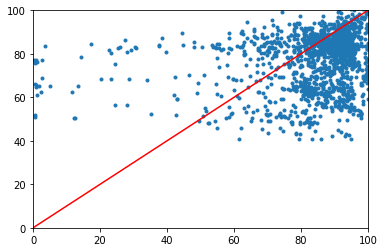

In [124]:
plt.plot(y_train.iloc[:, 0], y_pred, linestyle = '', marker = 'o', markersize = 3)
plt.plot([0, 100], [0, 100], color = 'red')
plt.xlim(0, 100)
plt.ylim(0, 100)